
# Multiple Linear Regression 



This is a machine learning model that predicts the median housing price of a district in California. The dataset used here is 
based on 1990 California census. Here, the target variable is **median housing price** depends on other metrics such as **population, median income, total rooms and bedrooms** etc.        

*housing.tgz* is downloaded from the internet, which contains the csv dataset flie *housing.csv.*   

> Note : A TGZ file is a type of compressed file that is used to store and transfer data. It is also known as a "tarball" because it combines multiple files into one archive using the "tar" (tape archive, a utility program commonly used in Unix and Linux operating systems to create and manipulate collections of files stored as a single archive file.) utility and then compresses the archive using the "gzip" compression format (a comression algorithm), resulting in a file with the extension ".tgz" or ".tar.gz".

# Getting ready with the data

Before we do anything, we have to import the data into our program. Let's have a function which does that for us.             
When *load_data* is called, it opens *housing.tgz* ('with' here is an exception that makes sure that file is closed after performing operations) and extracts the file into given path. finally, the function returns the the dataset in the form of pandas dataframe.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile

def load_data():
    with tarfile.open('housing.tgz') as housing_tarball:    #open the file
        housing_tarball.extractall(path="Dataset")          #extract the files 
    return pd.read_csv(Path("Dataset/housing/housing.csv")) #read the csv file
    
housing = load_data()

Now we have imported the dataset. So let's get the view of the data inside.

In [2]:
housing.head()    #print the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()   #information about the data in the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*head()* is a pandas method that prints first n rows given the parameter n.                                         
*info()* method gives the basic information about the dataset, viz, *range, number of columns, column datatype, Non-NULL value count* and *memory usage.*                                                                                                         
As you can see, we have 9 numerical attributes and one object type attribute (ocean_proximity) which probably takes categorical value.

In [4]:
housing.describe()   #numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*describe()* method is used for numerical attributes which returns different measures such as *mean, sd, percentiles, and range*. 

In [5]:
housing.value_counts('ocean_proximity')     #categorical attribute

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

*value_counts()* is a method that shows differnet categories of a categorical attribute.

Now we have a vague idea of data inside the housing dataset. We can further plot histogram to visualize numerical attributes. These will be plotted as *range of values* against *number of instances.*

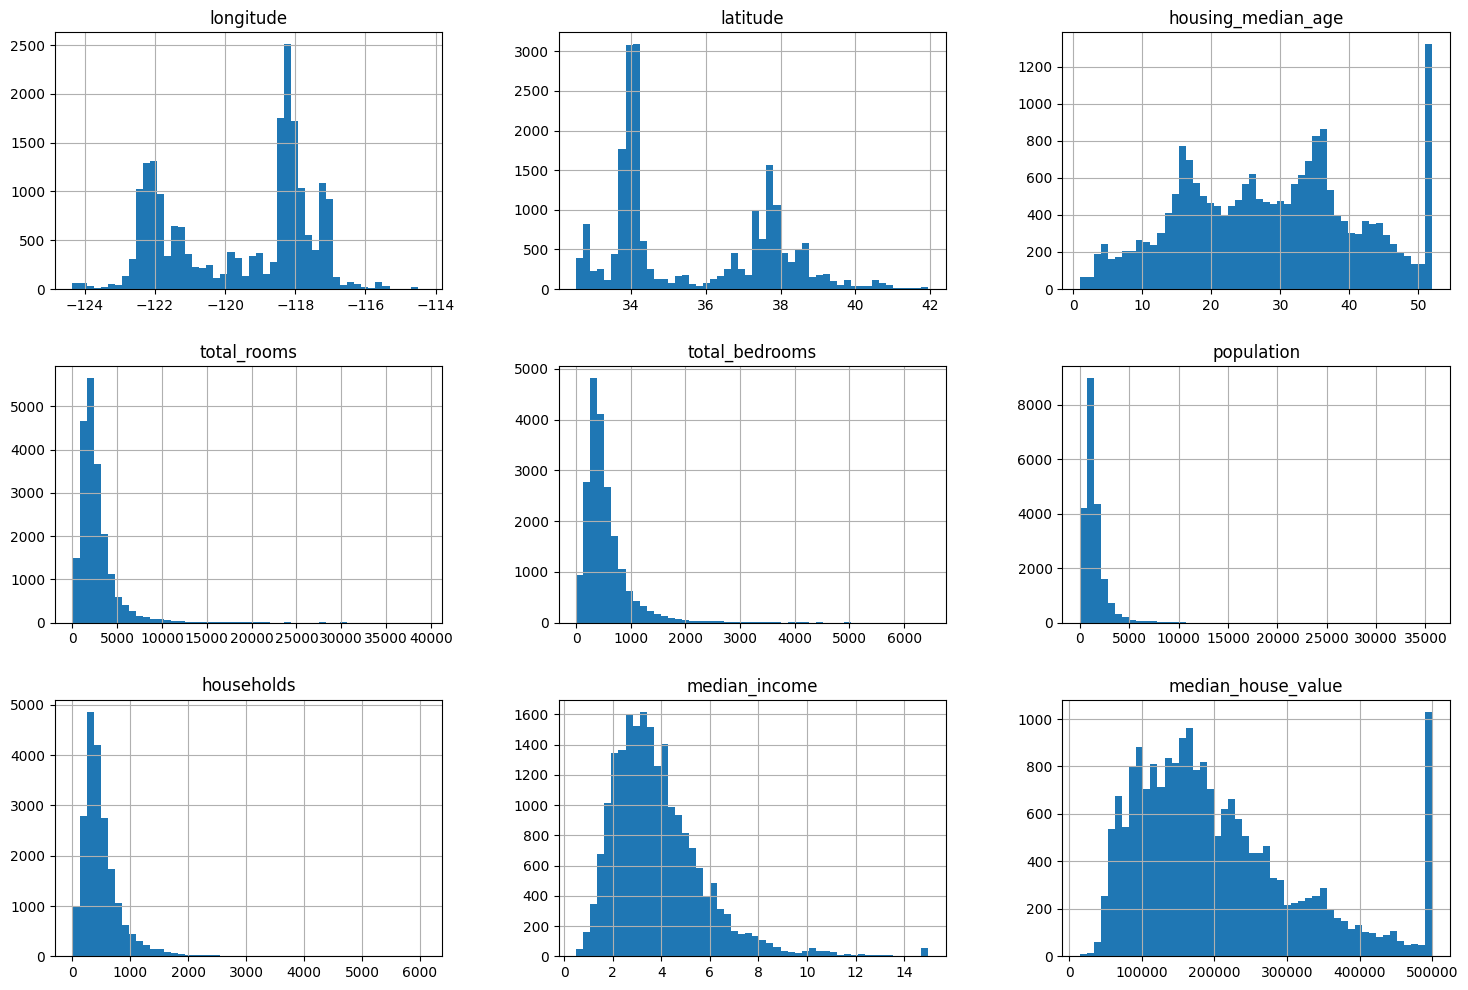

In [6]:
housing.hist(bins = 50, figsize=(18, 12));     #histograms of attributes with range of values in x-axis 
                                               #and number of instances in the Y-axis

We can conclude here that many histograms are skewed right.

Note:

> 1. *Median_income* was scaled and capped (When you say "data was capped" in a data visualization context, it means that a maximum value or limit was set on a particular variable, and any values above that limit were truncated or capped at that maximum value.) at 15.0001 for higher median incomes, and at 0.4999 for lower median incomes. <br>
> 2. The *housing_median_age* and the *median_house_value* were also capped.


# Creating Train and Test set
Before anything else, we have to split the data into train and test sets. There are hundreds of techniques and tools in hand for doing that. Here, we're gonna explore couple of those.

### Random Sampling  
It's a type of sampling where we randomly select instances to include in our sample. Each instance has a equal chance of being included in the sample. 

In [7]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [8]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [9]:
len(test_set)

4128

This works just fine. It shuffles the indeces and splits the data into train and test set at certain threshold. seed ensures the random indeces produced are same everytime the program is executed. This function is good for static dataset.

However, there is no guarantee that the same instance is always assigned to the same set, even if the dataset is updated (updated values/added instances/deleted instances). The reason we want to avoid this is to prevent *overfitting* (data will be trained on some of the instances of test set). 

The solution for this is to use identifier of every instance to produce hash key (The identifier is a unique and immutable value that is assigned to each instance in the dataset). This ensures consitancy in train and test set even after updation of dataset.

In [10]:
from zlib import crc32

def is_id_in_test_set(identifier):
    return crc32(np.int64(identifier)) < 0.2 * 2**32

def split_data_with_id_hash(data):
    ids = data["index"]
    in_test_set = ids.apply(is_id_in_test_set)
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id)

Here, *reset_index()* adds an index column to the housing dataset. That dataset is passed to function *split_data_with_id_hash.* *apply()* method lets you to apply a function to a column in a dataset. Here, *is_id_in_test_set* is applied on *ids* (index) column.                                                                            
Finally, *is_id_in_test_set* calculates the hash for every instance using crc32 algorithm and returns a boolean value.
The instances less than the specified threshold would be assigned to test set *(in_test_set)* and the otherwise would be assigned to train test *(~in_test_set)*.

Note: 

>0.2 is a split ratio (80:20).                                                                                          
~ (tilde) converts True into false and vice versa.


In [12]:
print (len(train_set))

16512


In [13]:
print (len(test_set))

4128


Now, there is a catch. You can only use this method only when you can be sure that no instances is gonna get deleted later, and you need to make sure that new data gets appended always at the end.                                             
Or we can use most stable attributes in the dataset. For example, longitude and lattitude, since they are highly unlikely to change in thousand years.

In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] 
train_set, test_set = split_data_with_id_hash(housing_with_id)

There are also ready-made ffunctions for this specific purpose. Scikit-Learn provides various functions to split the data in various ways. The simple one is train_test_split(), which is pretty much like shuffle_and_split_data().

Alright, everything we tried until now was random sampling. It's the simplest one and is best for the large data which has no subgroups, order or when there is no differences between subgroups. Or else we are introducing significant sampling bias. If there are subgroups, order, or difference in groups, we can opt for stratified sampling, systematic sampling or oversampling.<br>
When you look at it this way, there seems to be a correlation between *median income* and *median housing price.* So median income might be important attribute which potentially affects the target attriubute. Now we know that, we may want to create train set and test set such that they are well representatives of various income categories.

### Stratified Sampling

The type of sampling mentioned above is called stratified sampling. the population is divided into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.                                                                                                           
The income attribute is continuous, we have to create income categories. (when the attribute of interest is continuous, it is often divided into categories or intervals to create strata for stratified sampling.)                                         
The strata in this case would look like this.                                                                                
> 0 - 1.5, 1.5 - 3.0, 3.0 - 4. 5, 4.5 - 6.0, 6.0 - np.inf <br>                                             

You may notice how all instances in 6 to inf range are classified into one strata. This is because there are no enough data after 6. If the data were simply divided into intervals based on the minimum and maximum values, some strata may contain very few or no data points.

Note: 

> Since 20000 instances are reletively small, this is going to work pretty well. If the data were huge, the model might not be able to generalize well to the new instances. (To be true, if the data set is huge dividing into just train and test set would not work, let alone this.)

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])                    #creating strata of income

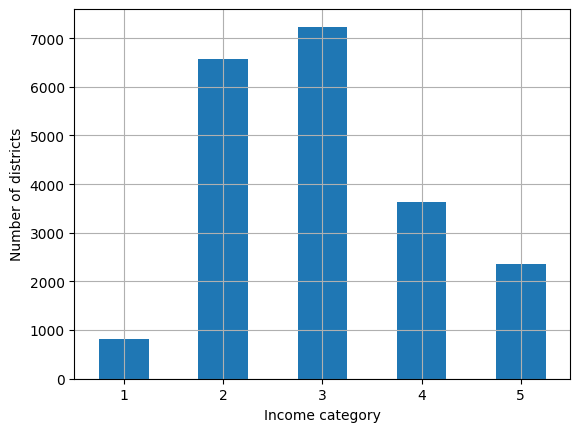

In [16]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("Income category") 
plt.ylabel("Number of districts") 
plt.show()

Now we have Income category (a categorical attribute), so we are all set for stratified sampling.                                
Scikit-learn's *model selection* package has many splitter classes, and we are gonna use *StratifiedShuffleSplit.*

**StratifiedShuffleSplit** is a cross-validation object which is a merge of **StratifiedKFold** (used for cross-validation, splits the data into K folds ensuring each fold has approximately the same proportion of samples from each class as the complete dataset) and **ShuffleSplit** (ShuffleSplit randomly shuffles the data and splits it into training and testing sets *multiple times*, i.e., repeated random subsampling), which returns stratified randomized folds. So StratifiedShuffleSplit
returns multiple train-test folds, each having equal proportion of samples from each class.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

>1. from sklearn.model_selection package we import StratifiedShuffleSplit class. splitter is an instance of this class. <br>  
2. Next we call split method inside a for loop passing the entire dataset(*housing*) and a categorical attribute (*housing["income_cat"]*, based on which the data is being stratified). This method splits the dataset into multiple folds of train-test sets (stratified sampling). Each fold uses different subset of dataset for splitting the data into train and test sets. (i.e., for each fold, train + test = dataset but each fold is unique).                               
Note : This method returns the indices, not the rows per se. <br>
<br>
3. The indeces returned in each iteration are used to get the train and test set, and appended to *strat_splits* list. So *strat_splits* contains '10' elements, each element is a list containing two DataFrames - train and test set. <br>

*StratifiedShuffleSplit* parameters : 

> * n_splits : Number of re-shuffling & splitting iterations.                                                                 
>  * test_size : If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.1.                                                                             
> * train_size : If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.                                                                                                                 
> * random_state : Ensures the consistancy of output across multiple runs. 

Using this splitting method, we get mupliple stratified split. But if we want only one,

In [18]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

To see if the different categories of income category is equally distributed in test set, we can run the following code : 

In [19]:
strat_test_set["income_cat"].value_counts().sort_index() / len(strat_test_set)

income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: count, dtype: float64

We don't need income_cat column anymore. So we can just delete that if we want to. 

In [20]:
del strat_train_set["income_cat"]
del strat_test_set["income_cat"]
del housing["income_cat"]

> Note : **del** keyword deletes anything permenently. So if you run this again, this would give key error because it is already deleted. So we can create exception or restart the kernel (in notebook) and run again.

In [21]:
print (strat_train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value   
13096      1576.0      1034.0         2.0987            458300.0  \
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAN

In [22]:
print (strat_test_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
3905     -121.95     37.11                21.0       2387.0           357.0  \
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   

       population  households  median_income  median_house_value   
3905        913.0       341.0         7.7360            397700.0  \
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   

      ocean_proximity  
3905        <1H OCEAN  
16821       <1H OCEAN  
2900       NEAR OCEAN  
7193       NEAR OCEA

Finally we are ready with train and test sets. ufff!!!

# Exploring the Data

### Visualizing Geographical Data

First off, we have geographical attribute in our data. It is good to create a scatterplot to visualize all the districts along with other metrics, viz, *Population* and *median housing value.* (Because it makes sense to correlate them with geographical location.)

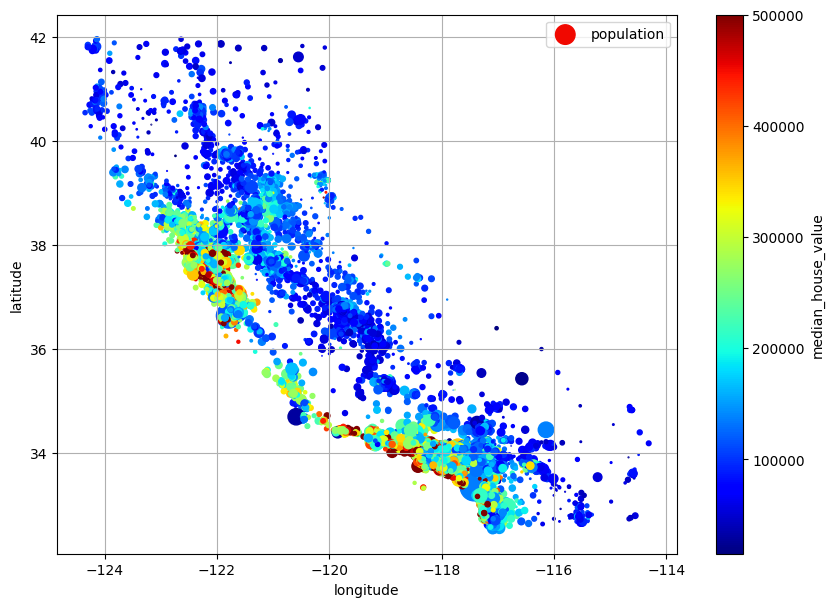

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 90, label = 'population',
             c="median_house_value", cmap="jet", colorbar=True,
             figsize=(10, 7))
plt.show()

This matplotlib *plot()* function plots the scatterplot we want.    

Parameters : <br>

> kind : type of plot <br>
x : x - axis <br>
y : y - axis <br>
grid : grids in the plot <br>
s : radius of markers (dots) in scatterplot, can take array of elements <br>
label : label that will be displayed in the legend. (legend helps explain the meaning of the different elements in a plot, like different lines of different colors in line chart.)<br>
c : colors to markers based on some attribute <br>
cmap : predefined color scale <br>
> colorbar : To add colorbar at the side <br>


To make this plot more stand out, we can overlay california map on the scatterplot. 

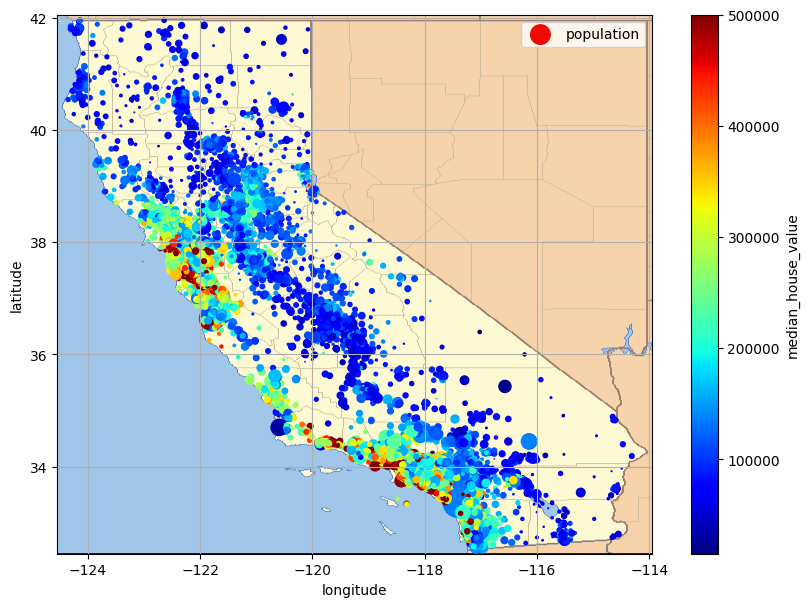

In [24]:
import matplotlib.image as mpimg
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 90, label = 'population',
             c="median_house_value", cmap="jet", colorbar=True,
             sharex=False, figsize=(10, 7))

california_img = mpimg.imread('california.png')
axis = -124.55, -113.95, 32.45, 42.05
plt.imshow(california_img, extent=axis)
plt.show()

1. We import *matplotlib.image* package. 
2. *imread()* reads the image on the computer's storage. 
3. *imshow()* is used to show the image on the screen. 

> Note : Here, the 'extent' parameter specifies the limits of the x and y axes in the plot, which are based on the longitude and latitude values in the housing dataset. If you remove the extent parameter from the imshow() function call, the image of California would be displayed in the plot with its original dimensions, which might not align with the range of values on the x and y axes of the scatter plot.

### Correlation between attributes

To understand the association between two variables, we can use the correlation matrix using corr() function:

In [25]:
corr_housing = housing

if 'ocean_proximity' in corr_housing:
    del corr_housing["ocean_proximity"]
else:
    pass

corr_matrix = corr_housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


There is another way for finding correlation between variables, i.e., *scatter_matrix()*. This plots scatterplot of each attribute vs every attribute. Here, we are only considering correlations greater than 0.1.

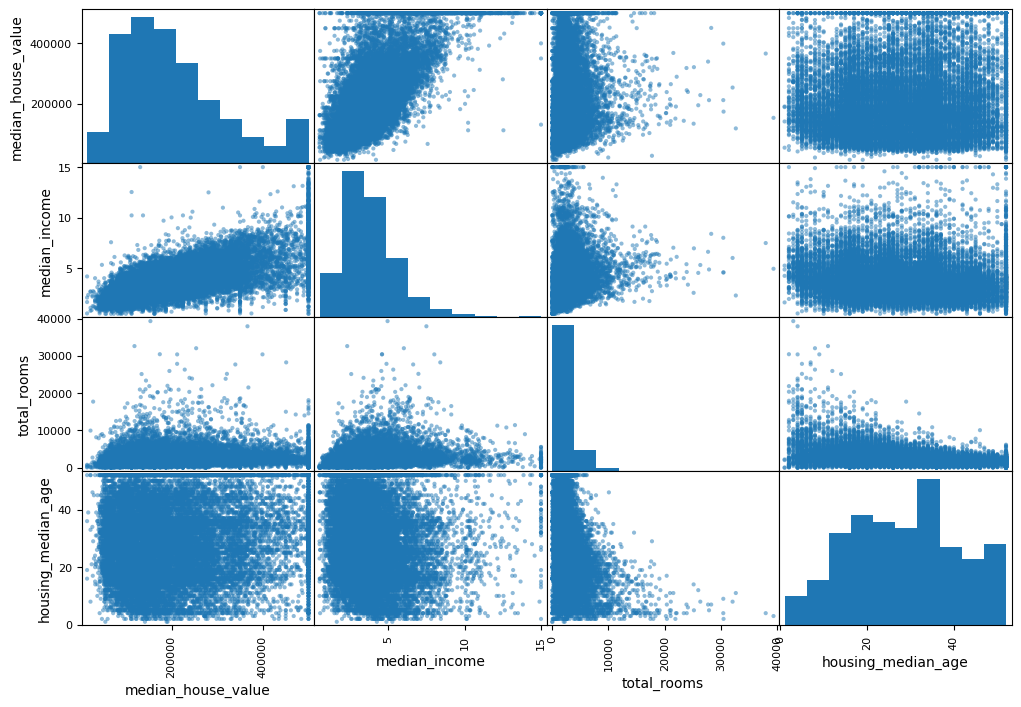

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8)) 
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead, the Pandas displays a histogram of each attribute.

The *median_income* looks like the most promising attribute to predict *median_house_value* (there is a linearity). So let's take a closure look at that.

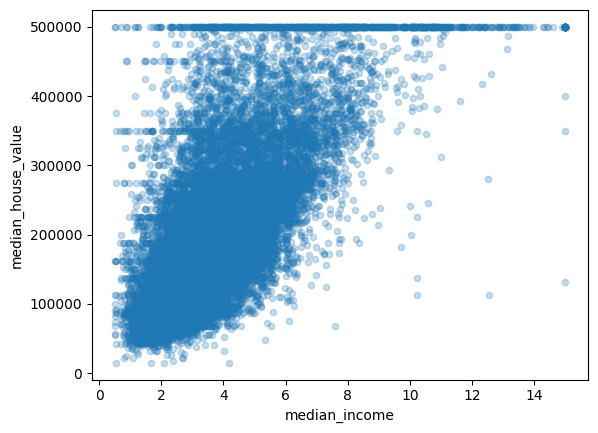

In [27]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.25)
plt.show()

You can see horizontal line at 500_000 as a result of capped data. Not just that, we can also see a line at 450_000, 350_500 and perhaps at 280_000 and few more below that. If we don't take care of this, the algorithm may learn to reproduce these data quirks. 
>The correlation coefficient only measures linear correlations (“as x goes up, y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “as x approaches 0, y generally goes up”).

##### Things we learnt from data exploration 

> 1. few data quirks that we may want to clean up before feeding to ML algorithm. (The reason is mentioned above.)
  2. correlation between attributes in relation with the target attribute.
>  3. some attributes have a skewed-right distribution, so we may want to transform them. 

<br>
Note: <br>
A skewed distribution occurs when the frequency of one class or value in the dataset is significantly higher than the others. It can cause some adverse effect on the model's prediction such as creating bias or poor performance on minority class. The data itself becomes non-representative in that case.

One more thing we wanna do before we step up is trying out different *attribute combination* to get meaningful metrics/info out of it. 

In [28]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] 
housing["people_per_house"] = housing["population"] / housing["households"]

Some of the metrics in our dataset such as *total_rooms*, *total_bedrooms* are not very useful. But metrics derived from these attributes, *rooms_per_house*, *bedrooms_ratio* may reveal few important things. 
In the same way, people per house in every district seems quite interesting.

And now the correlation matrix:

In [29]:
corr_matrix = housing.corr()
print (corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64


Data exploration is definitely not a one-time gig. So it does not have to be thorough, you can always come back to this later to gain insights.

# Preperation of data

First thing we do in the data prep might be seperating features and labels. The separation of features and labels in data preparation is a common practice in supervised machine learning tasks. By treating features and labels separately, we can apply specific transformations to each of them, ensuring that the data is appropriately prepared for the model.

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

We are dropping the column *median_house_value* from *strat_train_set* and assigning the resulting DataFrame to the variable *housing*. Also we are copying the column *median_house_value* to a variable called *housing_labels*.

>  Note : *drop* function does not affect the *strat_train_set*. <br>
*axis* specifies the axis along which the operation should be performed. It takes 0 (by default) and 1. 0 Indicates            that the operation should be performed along the rows (horizontally), and 1  Indicates that the operation should be            performed along the columns (vertically). 

### clean the data 
We already noticed earlier that *total_bedrooms* had missing values. To fix that, we can use one of these method:
1. Get rid of the corresponding districts. 
2. Get rid of the whole attribute. 
3. Set the missing values to some value (zero, the mean, the median, etc.). This is called *imputation*.

We decide to go with the option 3 since it's the least destructive. Instead of preceding code, we can use a handy Scikit-Learn class called - simple imputer.

In [31]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

There are advantages in using this imputer class. First is, we can use the imputer on any dataset, also on the updated data. And second advantage is this class calculates the imputer for all the features, so we are safe even if we encounter missing values in some other feature.

Strategy takes other parameters also: 
1. mean : (strategy="mean"), 
2. the most frequent value : (strategy="most_frequent")
3. constant value : (strategy="constant", fill_value = …) 

The last two strategies support non-numerical data.

Since median is only applicable on numerical attribute, we need to create a dataset with only numerical attriubute. 

In [32]:
housing_num = housing.select_dtypes(include=[np.number])

Now that we have the imputer and data containing only numerical attribute, we can fit the imputer instance to the training data using the *fit()* method.

In [33]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now you can we this “trained” imputer to transform the training set by replacing missing values with the learned medians:

In [35]:
X = imputer.transform(housing_num)

NOTE:
> There are also more powerful imputers available in the sklearn.impute package (both for numerical features only):
> - **KNNImputer** <br>
replaces each missing value with the mean of the k-nearest neighbors’ values for that feature. The distance is based on all the available features.
> - **IterativeImputer** <br>
trains a regression model per feature to predict the missing values based on all the other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.

*imputer.transform* returns numpy arrays, even though the inpput was pandas DataFrame. So we have to convert it back to DataFrame, and the good thing is it's not so hard.

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

now *housing_tr* is our training set, without any categorical attributes, and null values replaced with median of that perticular attribute.

In [37]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Transform categorical attributes

Categorical attribute *ocean_proximity* is just as important as others. This contain texts, not just some texts, but fixed number of possible values. We can convert this into numbers since it's preferable, using Scikit-Learn’s OrdinalEncoder class:

In [38]:
housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

*sklearn.preprocessing.OrdinalEncoder.fit_transform* encode categorical features as an integer array. This results in a single column of integers (0 to n_categories - 1) per feature.

In [39]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

As it is in the name, this encoder is best suited for ordinal attribute. If you use this encoder for nominal attribute it assumes that it possesses some order in nature. But clearly, *ocean_proximity* does not. One way to solve this is to use *One-hot encoding.* The attribute thus produced sometimes called *dummy* attribute.

In [40]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder() 
housing_cat_1hot = hot_encoder.fit_transform(housing_cat)

By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array:

In [41]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

To convert it into numpy arrays (dense matrix):

In [42]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Note:

> A *sparse* matrix is a very efficient representation for matrices that contain mostly zeros. internally it only stores the nonzero values and their positions, so lot of memory space is saved. Contrarily, all the values stored in *dense* matrix are non - zero values. If you want a dense matrix, you can you can set sparse=False when creating the OneHotEncoder.

You can get the list of categories using encoder's categories_ instance variable. 

In [43]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

*OneHotEncoder* remembers the which categories it was trained on. So when it is fed new values for *ocean_proximity* attribute, it converts it into *one-hot encoding* without a problem. <br>
OneHotEncoder is smarter, it even detect the unknown category and raise an exception. If you prefer, you can set the handle_unknown hyperparameter to "ignore", in which case it will just represent the unknown category with zeros: <br>
    
    cat_encoder.handle_unknown = "ignore"

Note:

> When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the feature_names_in_ attribute. Scikit-Learn then ensures that any DataFrame fed to this estimator after that (e.g., to transform() or predict()) has the same column names.
<br>

TIP:

> If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita).

## Feature Scaling and Transformation

*Feature scaling*, also known as data normalization, is a preprocessing step in machine learning that aims to bring different features or variables to a similar scale or range. <br>
Machine learning algorithms don’t perform well when the input numerical attributes have very different scales. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms. 

Warning: 

> training any estimators on the validation set or test is not preferred because it can lead to biased model evaluation and overfitting to the validation set. Therefore, it is important to train them only on training test. This practice helps prevent biased model evaluation and overfitting. Once you have a trained the estimator, you can then use it to transform() any other set (dev set or test set). 

Scikit-learn provides several methods for feature scaling. Two commonly used techniques are:
1. Standardization: <br>
Standardization, also known as z-score normalization, scales the features to have zero mean and unit variance (mean = 0, varience = 1). This transformation subtracts the mean from each feature and divides it by the standard deviation. The *StandardScaler* class is used for standardization.
2. Min-Max Scaling: <br>
Min-Max scaling, also known as normalization, scales the features to a specific range, typically between 0 and 1 (*feature_range* hyperparameter lets you change the range). It subtracts the minimum value and divides by the range (maximum - minimum). The *MinMaxScaler* class is used for min-max scaling.

In [44]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) 
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [45]:
from sklearn.preprocessing import StandardScaler 

standerd_scaler = StandardScaler() 
housing_num_standerd_scaled = standerd_scaler.fit_transform(housing_num)

Note:

> If you want to scale a sparse matrix without converting it into dense matrix, use StandardScaler with its with_mean hyperparameter set to False. Otherwise it would assume that the matrix provided is dense matrix and substract mean even from zero values, resulting in more non-zero values. This would break sparsity of the matrix.

Now we have scaled the *whole* dataset into similar range (*housing_num_min_max_scaled* ranges from -1 to 1, *housing_num_standerd_scaled* ranges from -3 to 5 *approx*.). Note that these transformed datasets using MinMaxScaler and StandardScaler are infact in numpy arrays. 

#### Transformation of attrubites with asymmetrical distribution before feature scaling is beneficial

When a feature’s distribution has a *heavy tail* (in this case most of all), feature scaling done using both min-max scaling and standardization result in skewed scaling (because of the large number of outliers), further resulting in inaccurate and unadequate capture of underlying patterns, which ML models doesn't like at all. Therefore, it is preferred to shrink the heavy tail, and if possible to make the distribution roughly symmetrical, before feature scaling. This way it also satisfies the assumptions of *MinMaxScaler* and *StandardScaler* that the data follows normal distribution.

There are two types of asymmetrical distribution are seen here:
1. Heavy positive tailed 
2. Multimodal 

**Heavy positive tailed** distribution has a very long tail on the right. It roughly follow the power law (one variable is proportional to a power of the other variable). In that case, we can take the sqrt or log of the attribute to make it normally distributed. <br>
Here is the sample code: 

    import numpy as np        
    housing_labels.hist(bins = 50)

    log_labels = np.sqrt(housing_labels)
    log_labels.hist(bins = 50)
    
Bucketizing is also one of the popular way of doing this. This means chopping its distribution into roughly equal-sized buckets, and replacing each feature value with the index of the bucket it belongs to. Bucketizing with equal-sized buckets results in a feature with an almost uniform distribution, so there’s no need for further scaling.

**Multimodal distribution** have two or more peaks (called *modes*). Bucketizing also works here in the same way. <br>
Another approach to transforming multimodal distributions is to add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode. This is done with the help of RBF kernel:

In [46]:
from sklearn.metrics.pairwise import rbf_kernel 
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

#print (housing["housing_median_age"].head(10))
#print (age_simil_35[:10])

**RBF kernel** <br>

A *kernel function* in general is of the form K: X x X -> R where K(x,x') = K(x',x). You can think of it like a measure of similarity x and x'. This is useful because often classifiers in high dimensional spaces can use the kernel function to look for instances in a "neighborhood" of a labeled instance. In effect, you transform to a basis where each component is the similarity to a known instance. This represents the data in a space where it is often possible to linearly separate the classified instances. <br>

The RBF kernel is a standard kernel function in R^n space, because it has just one free parameter (gamma) and satisfies the condition K(x,x') = K(x',x). One way to think of the RBF kernel is that if we assume x' is characteristic of some gaussian distribution (it is the mean value of that distribution), then RBF(x,x') is the probability that x is another sample from that distribution. In this interpretation, gamma is related to the tunable variance of that distribution.

Since it is interpreted as measure of similarity, higher the value is, more similar two points are. RBF kernel defines similarity as eudlicean distance between the two inputs. If the two inputs are right on top of eachother, they get the maximal similarity of 1. If they are "too far" away from each other, the RBF kernel just says they aren't similar (returning a value near 0). The gamma parameter controls how how far away "too far" is.

In the our case, the RBF is used to calculate the similarity between the *housing median age* and age 35 (which is one of the modes) in the distribution. The distance between the housing median age and the age 35 is computed, and the RBF function is applied to this distance to obtain a similarity value. This similarity value represents how closely the housing median age relates to a particular mode. You can see how values close to 35 (e.g., 34 and 36) have the maximum value (rougly to 9).

Gaussian RBF feature measuring the similarity between the housing median age and 35: <br>

![xxx](https://imgur.com/wSjA743.png)

Note:
> So far we’ve only looked at the input features, but the target values may also need to be transformed. But if you transform target attribute, then prediction done would also be scaled. Luckily, most of Scikit-Learn’s transformers have an inverse_transform() method, making it easy to compute the inverse of their transformations. It will remember which transformer was applied, so no need to specify it. 
Below shows the example code:

     from sklearn.linear_model import LinearRegression 
     
     target_scaler = StandardScaler()   # create transformer object
     scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())  # fit and transform data
     
     model = LinearRegression()    # create a linear regression model 
     model.fit(housing[["median_income"]], scaled_labels)  # fit the model 
     
     some_new_data = housing[["median_income"]].iloc[:5]  # this is new data 
     scaled_predictions = model.predict(some_new_data)  # prediction
     predictions = target_scaler.inverse_transform(scaled_predictions)  # transform back
     
> Simpler option is to use a TransformedTargetRegressor.

    from sklearn.compose import TransformedTargetRegressor 
    
    model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
    model.fit(housing[["median_income"]], housing_labels) 
    predictions = model.predict(some_new_data)

> Everything is done the same way we did previously, but the number of lines is less.

### Custom trasformers

Often in data cleaning and preprocessing we want to create our own custom transformers or convert an existing Python function into a transformer. This can be done using the function *FunctionTransformer* from *sklearn.prerocessing* package.
e.g., Here is the code for creating custome log-transformer:

    from sklearn.preprocessing import FunctionTransformer 
    log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) 
    log_pop = log_transformer.transform(housing[["population"]])
    
If you want to create a transformer that trains on the data using fit() method and then transform it later, you need to create a custom class that is capable of making custom transformer:  

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin # classes for custom transformer
from sklearn.utils.validation import check_array, check_is_fitted # functions for input validation

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self # always return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_ 
    

scaler = StandardScalerClone()
X_train = np.array([1,2,3,23,3,4,3]).reshape([-1,1])
scaler.fit(X_train).transform(X_train) # method chaining

array([[-0.63770837],
       [-0.49820966],
       [-0.35871096],
       [ 2.43126315],
       [-0.35871096],
       [-0.21921225],
       [-0.35871096]])

+ *Base estimator* is the base class for all estimators in scikit-learn. It provides the essential methods and properties that are common to all estimators. The common methods included in BaseEstimator class are `fit(X, y)`, `predict(X)`, and `score(X, y)`. Note that *transform* method is a child class method. 

+ *TransformerMixin* is another class provided by scikit-learn that helps in creating transformer classes. This belongs to special category called Mixin classes, which are specifically created to give extra functionality to classes. Now this class has two key methods - `fit_transform(X, y=None, **fit_params)` and `transform(X)`. 

+ So if you ever want to create custom transformer, these two classes are out there.

+ `check_array` and `check_is_fitted` are utility functions used for input validation. `check_array` ensures that the data passed is of the valid format (list, DataFrame, or np.array). `check_is_fitted` verifies if an estimator has been fitted or not before transformation or prediction. 

+ *StandardScalerClone* is our transformer class closely similer to StanderScaler transformer. It has three methods - *&#95;&#95;init&#95;&#95;()*, *fit()* and *transform()*. &#95;&#95;init&#95;&#95;() method has a variable called *with_mean* which is assigned to True. This determines whether the StanderScalar transformation is done with or without mean. fit() method checks for the valid input and calculates mean and standerd deviation of the input. Finally transform() method tests bunch of things and transform the input by substracting each value by mean, then dividing by std.

+ *fit()* must return self to allow method chaining (invoke multiple methods on an object in a single line of code, one after another).

A custom transformer can (and often does) use other estimators in its implementation. For example, the following code demonstrates custom transformer that uses a KMeans clusterer in the fit() method to identify the main clusters in the training data, and then uses rbf_kernel() in the transform() method to measure how similar each sample is to each cluster center:   
    
    def fit(self, X, y=None, sample_weight=None): 
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state) 
        self.kmeans_.fit(X, sample_weight=sample_weight) 
        return self 
        
    def transform(self, X): 
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

This outputs the 2D array of size (16512, 10). It contains rbf similarity measure of each district with 10 cluster centres. 

## Transformation Pipelines 

Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator. Scikit-learn's pipeline class is a useful tool for encapsulating multiple different transformers alongside an estimator. Pipeline sequentially apply a list of transformers and a final estimator. Intermediate steps of the pipeline must be transformers, that is, they must implement `fit` and `transform` methods. The final estimator only needs to implement `fit`. <br>

The `sklearn.pipeline` package provides two main methods two create a Pipeline. `Pipeline` and `make_pipeline`. Pipeline constructor takes a list of name/estimator pairs (2-tuples) defining a sequence of steps. Name can be anything, as long as they are unique and don’t contain double underscores (\_\_). Here is an example of how to use it:

In [48]:
from sklearn.pipeline import Pipeline 
num_pipeline = Pipeline([ 
    ("impute", SimpleImputer(strategy="median")), 
    ("standardize", StandardScaler()),
])

You can visualize the pipeline diagram:

In [49]:
from sklearn import set_config

set_config(display='diagram')
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

If you don’t want to name the transformers, you can use the `make_pipeline()` function instead; it takes transformers as positional arguments and creates a Pipeline using the names of the transformers’ classes, in lowercase and without underscores (e.g., "simpleimputer").If multiple transformers have the same name, an index is appended to their names (e.g., "simpleimputer-1", "simpleimputer-2", etc).

In [50]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all the transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it just calls the fit() method.

### column transformer

`sklearn.compose.ColumnTransformer` applies transformers to columns of an array or pandas DataFrame. This is useful because it allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. We can use `ColumnTransformer` when we have heterogeneous data.

Here is the code snippet showing how to use it:

    from sklearn.compose import ColumnTransformer
    
        cat_attribs = ["ocean_proximity"] 
        
        cat_pipeline = make_pipeline( 
              SimpleImputer(strategy="most_frequent"), 
              OneHotEncoder(handle_unknown="ignore"))
              
        preprocessing = ColumnTransformer([ 
                ("num", num_pipeline, num_attribs), 
                ("cat", cat_pipeline, cat_attribs),
             ])
    
Hardcoding column names does not look very convinient. Therefore we can use `make_column_selector()` which automatically select all the features of a given type, such as numerical or categorical.

In [51]:
from sklearn.compose import make_column_selector, make_column_transformer 

cat_pipeline = make_pipeline( 
          SimpleImputer(strategy="most_frequent"), 
          OneHotEncoder(handle_unknown="ignore"))
          
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)),
)                                     

After we can use *fit_transform()* to fit and transform the attributes. 

We are almost done with data preprocessing phase. But instead of applying different transformers and estimators for different attributes seperately, we can use Pipeline which would be 10-20 lines of code. It would be easy and neat if everything is in one place. 

Let's recap what we have done so far.

1. Missing values in numerical features will be imputed by replacing them with the median. In categorical features, missing values will be replaced by the most frequent category.
2. The categorical feature will be one-hot encoded.
3. A few ratio features will be computed and added: bedrooms_ratio, rooms_per_house, and people_per_house.
4. A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.
5. Features with a long tail will be replaced by their logarithm.
6. All numerical features will be standardized, with StanderdScaler. 

Now let's write the code to build the Pipeline:

In [52]:
# import packages
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

class ClusterSimilarity(BaseEstimator, TransformerMixin): # Custom transformer to measure cluster similarity
    def __init__(self, n_clusters=10, gamma=1, random_state=42): 
        self.n_clusters = n_clusters 
        self.gamma = gamma 
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None): 
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state) 
        self.kmeans_.fit(X, sample_weight=sample_weight) 
        return self 

    def transform(self, X): 
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None): 
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

    
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in): 
    return ["ratio"] # feature names out

def ratio_pipeline(): 
    return make_pipeline( 
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name), 
        StandardScaler())

log_pipeline = make_pipeline( 
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log, feature_names_out="one-to-one"), 
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

cat_pipeline = make_pipeline( 
    SimpleImputer(strategy="most_frequent"), 
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())


preprocessing = ColumnTransformer([ 
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]), 
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]), 
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]), 
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline)  # one column remaining: housing_median_age

Let's break down the code:

1. First we imported all the necessery packages.
2. 'ClusterSimilarity' is a CustomTransformer for geographical attributes `lattitude` and `longitude`. It has 'fit', 'transform' and 'get_feature_names_out' methods alongside \_\_init\_\_ function.
     - 'fit' method is for finding 10 clusters. It takes the tuple [lattitude, longitude], and creates 10 clusters using KMeans algorithm. 
     - 'transform' method also takes the tuple [lattitude, longitude] as input and calculates similarity measure for each district and 10 cluster centre. 
     - 'get_feature_names_out' is a method for new feature names after transformation, when we call `get_feature_names_out()` (I guess). <br>
<br>
So when 'cluster_simil' is given in ColumnTransformer, it goes to the ClusterSimilarity and calls all methods. For naming features, it adds to underscones after the specified transformer name ("geo" in this case) and adds whatever get_feature_names_out() returns after it. 
3. Ratio pipeline is up next. It is for new attributes `bedrooms`, `rooms_per_house`, `people_per_house`. 'ratio_pipeline' is a function returning a pipeline (You can see and understand it from the code). 
    - little explaination on custom transfomer in the pipleline; It takes two parameter, column_ratio and feature_names_out. Both should be callable. column_ratio is a function that takes the ratio of 1st column to the 2nd column in a tuple. 'feature_names_out' is a keyword argument in FunctionTransformer that determines the feature names that will be returned by get_feature_names_out(). It calls a function with two arguments passed - transformer applied to the data (column_ratio) and the column names in the data. What happens after is the same. 
4. log_pipeline, cat_pipeline and default_num_pipeline are simple and easy to interpret. 
5. There's a `remainder` hyperparameter, that determines what to do with remaining columns. You can set it to *passthrough* if you want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped.
6. In log pipeline's FunctionTransformer, feature_names_out is set to *one-to-one* indicates the output feature names will be equal to input feature names. 

Note: 

> Not all the FunctionTransformers are given the 'feature_names_out' argument, that might be because of whatsoever reasons. 
get_feature_names_out's feature naming convention is not something you need to burn your calories on, so just go get the names and do not worry about it.

In [53]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [54]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

So far we have framed the problem, got the data and explored it, created train and test sets, seperated labels and features, wrote a preprocessing pipeline to automatically clean up and prepare your data. Next step is to go and select the model and train our data.

To clear things up, *housing* is the training set without the label *median_house_value*. *housing_labels* is a set containing only one column, i.e., the label *median_house_value*. [*housing_prepared* is a transformed dataset that is cleaned, scaled, encoded and been added with more useful features.]

# Select and Train a Model

### Linear Regressor

To get started let's train a basic linear regression model to our data:

In [55]:
from sklearn.linear_model import LinearRegression 

lin_reg = make_pipeline(preprocessing, LinearRegression()) 
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1.0),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021BE1157950>)])),
                ('linearregression', LinearRegression())])

Apperently, using the preprocessed data gives you the same results.

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Let's see predict the housing price and compare with actual housing price:

In [57]:
housing_predictions = lin_reg.predict(housing_prepared)   # using preprocessed data gives the same results 
                                                          # as using the raw data with preprocessor
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([243700., 372400., 128800.,  94400., 328300.])

Note: round() function works different for different type of input. If a number is integer and round parameter is positive, it just returns that number. If a number is float and round parameter is positive, it rounds a number to a specified number of decimal places. If a number is integer/float and round parameter is negetive, it rounds the number to the nearest multiple of 10 raised to the power of the absolute value of the given parameter.

In [58]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

The prediction seems to be way off. But to test how much it is, we can use RMSE performance measure (Remember lower is the better, how much 'lower' depends on the scale of the target value):

In [59]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False) # True returns MSE
lin_rmse

68687.89176590016

RMSE of 68688 seems very high for a range 15k - 500k with standerd deviation 115314 (Honestly I can't tell how bad it is).

**RMSE**:

Root mean squared error is a scale-dependent metric. i.e., there's no way of telling what a good rmse is. We know lower is the better, but that statement too abstract. It depends on the range, standerd deviation of the target variable and also domain of the problem. But in comparision, model having lower rmse considered better. 

RMSE has the same unit as the dependent variable (DV). It means that there is no absolute good or bad threshold, however you can define it based on your DV. For a datum which ranges from 0 to 1000, an RMSE of 0.7 is small, but if the range goes from 0 to 1, it is not that small anymore. 

Here is one interpretation of rmse(can't confirm it tho) - For a given model, you can find the distribution of deviations by just computing model(x) - y for all of your data points. Then the standard deviation of that distribution is exactly the RMSE. 
So a good sanity check is that the RMSE of your model should be significantly below the standard deviation of the actuals. Standard deviation = RMSE if your model just used the mean value of the actuals for every prediction. 

But you can't tell how small is acceptable. As stated above, it depends. what is or is not acceptable goes way beyond statistics. 

Note: But you can normalize the rmse capping it between 0 and 1 (rmse/range). <br>
<br>

### Decision Tree Regressor 

In [60]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [61]:
housing_predictions = tree_reg.predict(housing_prepared) 
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

tree_rmse

0.0

This is ovbiously overfitting the data. 0 is the minimum value rmse could have. So we try different models and statergies  until we get a good rmse score compared to the rest.

### Metrics and scoring: quantifying the quality of predictions

There are 3 different APIs for evaluating the quality of a model’s predictions:

**Estimator score method** <br>
Every estimator in sci-kit learn has a `score` method providing a default evaluation criterion for the problem they are designed to solve. The specific evaluation criterion varies depending on the type of problem. For example, in classification problems, 'accuracy' is commonly used as the default evaluation criterion.

**Metric functions** <br>
The sklearn.metrics module implements functions assessing prediction error for specific purposes (such as regression, classification, clustering, etc). These functions allow you to compute specific metrics to evaluate your model's performance beyond the default evaluation criterion. e.g., You can use the 'silhouette_score' function to measure the quality of the clusters generated by the clustering model. 

**Scoring parameter** <br>
Scikit-learn provides model evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) which internally rely on a scoring strategy to evaluate models. The scoring parameter is often used in conjunction with metric functions, as you can specify a desired metric function to be used for evaluation by passing it as the value of the scoring parameter.

There's one more called 'Dummy estimator'. Refer other resources for details.

Note: 
> Cross validation (CV for short) is a resampling method that uses different portions of the data to train and test a model on different iterations. Available data is split into multiple subsets or folds. The model is trained on a combination of these folds and then evaluated on the remaining fold. This process is repeated multiple times, with each fold serving as the evaluation set once. <br> <br> On the other hand, this is also used while model evaluation - to quantify model's performance. When assessing the performance of a model, it's important to understand how well it generalizes to unseen data. Simply evaluating the model on a single train/test split may not provide a robust measure of its performance because the specific split of data can influence the results. In this case, cross validation can be used for getting more reliable estimate. <br><br> `cross_val_score` and `GridSearchCV` are tools used to Evaluate a score by cross-validation. As mentioned earlier, CV is advantagous since it provides better estimate of model's score. Also you are free to choose your on score criterion here. There are usually metric functions, passed as a parameter. <br><br> When these are used, the model is trained on available training data based on CV. Then the specified score criterion is calculated based on predictions made, in each iteration. At the end, score is aggregated to give the overall performance of the model. After selecting the best model, the model can be trained on the whole training set (This is important to note, Cross_val_score is a way of assessing a model and it’s parameters, and cannot be used for final training. Final training should take place on available training data and tested using a test set). The model parameters calculated during CV won't affect the final prediction. 


## Better evaluation using Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score 

tree_rmses = -cross_val_score(tree_reg, housing_prepared, housing_labels, 
                              scoring="neg_root_mean_squared_error", cv=10) 
print("Mean score of %0.2f with a standard deviation of %0.2f" % (tree_rmses.mean(), tree_rmses.std()))

Mean score of 66016.83 with a standard deviation of 2406.78


As we can see, this did not make it any better. Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., it's standerd deviation). 

Note:

Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.<br>

utility function is based on utility theory: an agent's preferences over possible outcomes can be captured by a function that maps these outcomes to a real number; the higher the number the more that agent likes that outcome. The function is called a utility function.

### Random Forest regressor

Since neither of the models we tried earlier are performing well, we are gonna try one more regressor, *RandomForestRegressor*. <br>
Random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called *ensembles*: they are capable of boosting the performance of the underlying model (in this case, decision trees).

Let's take a look at the code (P.S: Since this takes couple minutes to excecute, I did not include it as a code):

    from sklearn.ensemble import RandomForestRegressor 

    forest_reg = RandomForestRegressor(random_state=42)
    forest_rmses = -cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                    scoring="neg_root_mean_squared_error", cv=10)
    print("Mean score of %0.2f with a standard deviation of %0.2f" % (forest_rmses.mean(), forest_rmses.std()))
    
\>>> Mean score of 46968.04 with a standard deviation of 990.01

mean 46968.04 and std 990.01 looks much better at this point. Let's try training it on the whole training set.

In [63]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [64]:
forest_reg.score(housing_prepared, housing_labels)

0.9770344254186455

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

17474.619286483998

This RMSE is reletively lower, for the range of our target label. Looking at the score, it's clear that there is still some overfitting going on. We can explore and try several other models/ get more data/ simplify the model to prevent this overfitting. But for this task, Random Forest looks fine.

## Tuning the hyper-parameters using of an estimator

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. These parameters can be optimized using hyper-parameter tuning techniques such as `Grid Search` and `randomized Search`. These use Cross Validation to complete the task.

The search consists of: <br>
An estimator: The estimator you want to search hyper-parameters over. <br>
Hyper-parameter space: grid of hyperparameters that you want to search over (hyper-parameter and the values). <br>
Cross-validation scheme: cv parameter, # of folds. 
Scoring function: criterion for choosing the best hyper-parameter values.

### GridSearchCV
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values. <br>
P.S: The following code takes some time since it has to iterate over data and train 45 times.  


    from sklearn.model_selection import GridSearchCV 
    full_pipeline = Pipeline([ 
        ("preprocessing", preprocessing),
        ("random_forest", RandomForestRegressor(random_state=42)),
    ])

    param_grid = [
        {'preprocessing__geo__n_clusters': [5, 8, 10], 'random_forest__max_features': [4, 6, 8]},
        {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, 10]},
    ]

    grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                               scoring='neg_root_mean_squared_error')
    grid_search.fit(housing, housing_labels)
    
    grid_search.best_params_    
    
\>>>  {'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

`param_grid` parameter specifies the grid of parameter values. You can refer to any hyperparameter of any estimator in a pipeline, even if this estimator is nested deep inside several pipelines and column transformers. For example, when Scikit-Learn sees "preprocessing__geo__n_clusters", it splits this string at the double underscores, then it looks for an estimator named "preprocessing" in the pipeline and finds the preprocessing ColumnTransformer. Next, it looks for a transformer named "geo" inside this ColumnTransformer and finds the "ClusterSimilarity" transformer we used on the latitude and longitude attributes. Similarly, `random_forest__max_features` refers to the `max_features` hyperparameter of the estimator named "random_forest", which is RandomForestRegressor estimator. max_features specifies number of features to be considered when looking for the best split. 

The 'score' of the model is available in the variable `best_score_`:
    
    grid_search.best_score_  # negetive because of the negetive scoring
    
\>>>  -44042.004170883105 

The evaluation scores are accessible using `grid_search.cv_results_`. This is a dictionary object.

    cv_res = pd.DataFrame(grid_search.cv_results_) 
    cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True) 
    -np.mean(cv_res["mean_test_score"])
    
\>>>  45673.239424024316 # RMSE of the model, best so far
<br>
<br>

> Note: `grid_search.cv_results_` consists of several columns such as *split0_test_score*, *split1_test_score*, *split2_test_score* ..
*mean_test_score*, *std_test_score*, etc (See the docs for more details). The number of rows is equal to number of hyperparameter combinations. 

### RandomizedSearchCV

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but RandomizedSearchCV is often preferable, especially when the hyperparameter search space is large. This approach has several benefits: <br>
1. Grid search only explores combination of hyperparameter you listed. And it becomes harder to list all if you want to explore huge number of combinations. Randomized search on the other hand, gives you the flexibility to choose how many ccombinations you want to explore (*n_iter*), and it randomly selects few combinations.
2. Grid search follows exhaustive sampling, therefore takes more time. Where as, Randomized search follows random sample, so comparatively better in terms of trainig time. Random search does not exhaustively evaluate all possible combinations. 

Scikit-Learn also has `HalvingRandomSearchCV` and `HalvingGridSearchCV` hyperparameter search classes. Their goal is to use the computational resources more efficiently, either to train faster or to explore a larger hyperparameter space. The search strategy starts evaluating all the candidates with a small amount of resources (small amount of available dataset) and iteratively selects the best candidates, using more and more resources in coming iterations.

In [66]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

full_pipeline = Pipeline([ 
        ("preprocessing", preprocessing),
        ("random_forest", RandomForestRegressor(random_state=42)),
    ])

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50), 
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV( 
    full_pipeline, param_distributions=param_distribs, 
    n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021BE10D5C90>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021BE1110490>},
                   random_state=42, scoring='neg_root_mean_squared_error')

`param_distributions` is a dictionary with parameters names (string) as keys and distributions or lists of parameters to try. Distributions must provide a rvs method for sampling (such as those from scipy.stats.distributions). If a list is given, it is sampled uniformly. It is highly recommended to use continuous distributions for continuous parameters. <br>
`n_iter` is a number of parameter settings (hyperparameter combination) that are sampled. 

# Analyzing the Best Models and Their Errors

### Best hyperparameter candidate 

The `RandomizedSearchCV.best_estimator_` attribute provides the best estimator found during the randomized search cross-validation process. It stores the best estimator that is already trained during the search, the estimator object that achieved the highest score based on the specific evaluation metric.

### Important features 

Feature importance tells you how useful a feature is, Higher the value, most useful it is. 

Tree-based models (such as regression, classification trees - decision trees) determine feature importance by evaluating how much each feature contributes to reducing the impurity or the overall node impurity in the decision tree. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

`permutation_imprtance` is an alternative to feature importance.

Random forest's `feature_importances_` is impurity-based. It is defined after the fit() method. The values of this array sums up to 1. 

In [67]:
final_model = rnd_search.best_estimator_ 

feature_importances = final_model['random_forest'].feature_importances_

# Print the feature importances
for feature_name, importance in zip(preprocessing.get_feature_names_out(), feature_importances):
    print(f"{feature_name}: {importance:.2f}")

bedrooms__ratio: 0.07
rooms_per_house__ratio: 0.05
people_per_house__ratio: 0.05
log__total_bedrooms: 0.01
log__total_rooms: 0.01
log__population: 0.01
log__households: 0.01
log__median_income: 0.19
geo__Cluster 0 similarity: 0.04
geo__Cluster 1 similarity: 0.01
geo__Cluster 2 similarity: 0.00
geo__Cluster 3 similarity: 0.01
geo__Cluster 4 similarity: 0.01
geo__Cluster 5 similarity: 0.01
geo__Cluster 6 similarity: 0.01
geo__Cluster 7 similarity: 0.01
geo__Cluster 8 similarity: 0.00
geo__Cluster 9 similarity: 0.01
cat__ocean_proximity_<1H OCEAN: 0.01
cat__ocean_proximity_INLAND: 0.01
cat__ocean_proximity_ISLAND: 0.00
cat__ocean_proximity_NEAR BAY: 0.01
cat__ocean_proximity_NEAR OCEAN: 0.01
remainder__housing_median_age: 0.01


We see more elements in the following code because of the rnd_search applied to preprocessing__geo__n_clusters. 

In [68]:
sorted(zip(feature_importances, 
           final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.013489636258229071, 'geo__Cluster 3 similarity'),
 (0.013383196263838682, 'geo__Cluster 38 similarit

With this information, you may want to try dropping some of the less useful features (We are not doing that here).

Note:

The `sklearn.feature_selection.SelectFromModel` transformer can automatically drop the least useful features for you: when you fit it, it trains a model (typically a random forest), looks at its `feature_importances_` attribute, and selects the most useful features. Then when you call transform(), it drops the other features.

Now we have our so-far-best model at our hand. But before testing it on the test set, we need to ensure whether it generalizes well on all categories of districts; whether they are rural or urban, rich or poor, northern or southern, minority or not, etc. If a model performs poorly on a whole category of districts, then it should probably not be deployed until the issue is solved, or at least it should not be used to make predictions for that category, as it may do more harm than good.

We should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem: adding extra features or getting rid of uninformative ones, cleaning up outliers, etc. Note that we try to polish our model close to perfection before the testing phase. 

After tweaking your models for a while, you eventually have a system that performs sufficiently well. All is left to do is test our model on the test set.

In [69]:
X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy() 

final_predictions = final_model.predict(X_test) 

final_rmse = mean_squared_error(y_test, final_predictions, squared=False) 
print(final_rmse) 

41424.40026462184


Note that the final model first transforms the test set then makes predictions. The snippet gives the RMSE of predictions of test labels and actual labels.

This error estimate certainly passes the criteria of rmse of test set should not be way higher than that of validation set's (Note that if we did lot of hyperparameter tuning, the model overfits the validation set, so does not perform well on the test set - RMSE would be way high). But how precise this estimate is? For this you can compute a '95% confidence interval' for the generalization error using `scipy.stats.t.interval()`.

In [70]:
from scipy import stats 

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])

The output we got is a 95% confidence interval. A confidence interval provides a range of plausible values for the population parameter (such as the mean) based on the sample data and the chosen confidence level. In other words, it says that the actual population parameter likely to fall in that interval. <br>

41424.40026462184 lies between that range, so we can confirm that the true rmse of test predictions is somewhere around there. <br>

t-distribution is one of the ways to construct a confidence interval. scipy's `stats.t.interval` method constructs a confidence interval based on t-distribution with the following parameters:

1. confidence 
2. degrees of freedom 
3. loc: the sample mean or estimate of population mean
4. scale: standard error of the mean (SD of sampling distribution of poplulation estimators;such as mean), which is the standard deviation divided by the square root of the sample size. 

There's one more thing to notice here: If we do lot of hyperparameter tuning, we might end up overfitting validation set (then RMSE we get on test set would be higher than RMSE of dev set). But when it happens we must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: we need to present our solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements. This is targeted on our clients, so it must be easy, elaborative and up to the point.

# Launch, Monitor, and Maintain

Now that we have our model, we deploy our model to production environment. The most basic way to do this is just to save the best trained model, transfer the file to production environment, and load it. To save the model, we can use the `joblib` library like this:

In [71]:
import joblib 

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

`pkl` is short for 'pickle' which is a method for storing data on the disk. Pickle can be used to ***serialize*** Python object structures, which refers to the process of converting an object in the memory to a byte stream that can be stored as a binary file on disk. When we load it back to a Python program, this binary file can be de-serialized back to a Python object.

Joblib is python library whic that provides easy to use interface for performing parallel programming/computing in python (The machine learning library scikit-learn also uses joblib behind the scene for running its algorithms in parallel). It is ideal for a situation where you have loops and each iteration through loop calls some function that can take time to complete. This kind of function whose run is independent of other runs of the same functions in for loop is ideal for parallelizing with joblib.

Both are the ways of saving an ML model. Joblib is faster than pickle if the model contains large np arrays, which they do, so it's better to go with Joblib here. 

`joblib.dump` (alternatively, we can use pickle.dump) are often used to save sklearn models. It takes pipeline and the file directory as parameters. 

Once it is loaded we can use it to predict new data as it comes.

    import joblib 
    [...] # import KMeans, BaseEstimator, TransformerMixin, rbf_kernel, etc. 
    
    def column_ratio(X): [...] 
    def ratio_name(function_transformer, feature_names_in): [...] 
    class ClusterSimilarity(BaseEstimator, TransformerMixin): [...] 
    
    final_model_reloaded = joblib.load("my_california_housing_model.pkl") 
    
    new_data = [...] # some new districts to make predictions for 
    predictions = final_model_reloaded.predict(new_data)

*sigh!!* It's over finally! 

Please note that everything was filtered from the book, and the internet, So when you go through this again (if you ever) keep in mind that it's missing some informations, tips, best practices, or might also be incomplete. For further inquiries, you can always look up 
in the book or on the internet.

Bye!!